### Modelos de predicción con Python

#### Función para crear modelos predictivos 

Se crea una función para agilizar el análisis de los modelos

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def modelos(prueba_X, prueba_Y, entrenamiento_X, entrenamiento_Y,
            algoritmo, tipo):

    print (algoritmo)
    algoritmo.fit(entrenamiento_X, entrenamiento_Y)
    prediccion = algoritmo.predict(prueba_X)

    print('Error cuadrático medio: {}'.format(
        mean_squared_error(prueba_Y, prediccion)))
    print('Raíz del error cuadrático medio: {}'.format(
        np.sqrt(mean_squared_error(prueba_Y, prediccion))))
    print('El coeficiente de determinación es: {}'.format(
        r2_score(prueba_Y, prediccion)))
    
    tabla = pd.DataFrame(prueba_X.copy())
    plt.figure(figsize=(15,10))
    plt.subplot(212)

    if tipo == "lineal":
        coef = pd.DataFrame(algoritmo.coef_)
    if tipo == "compleja":    
        coef = pd.DataFrame(algoritmo.feature_importances_)
    coef["importancia"] = entrenamiento_X.columns
    ax1 = sns.barplot(x=coef["importancia"], y=coef[0], palette="winter",
                             linewidth=2, edgecolor="k")
    ax1.set_facecolor("w")
    ax1.axhline(0,color="k", linewidth=2)
    plt.ylabel("Coeficientes")
    plt.xlabel("Parametros")
    plt.title("IMPORTANCIA DE CADA PARAMETRO")
    plt.savefig(str(tipo) + 'Importancia.png')
    return coef

def histograma(serie):
    print('Medidas de tendencia central de ',serie.name)
    print('Mediana: ',serie.median())
    print('Media: ',serie.mean())
    print('Moda: ',serie.mode()[0])
    print('Desviación estándar: ',serie.std())
    plt.figure(figsize=(13,6)) # indicar el tamaño 
    sns.histplot(serie,kde=True)   
    plt.axvline(serie.mean(), linestyle="dashed", label="mean", color="k")
    plt.axvline(serie.mode()[0], linestyle="dashed", label="mode", color="g")
    plt.axvline(serie.median(), linestyle="dashed", label="median", color="b")
    plt.legend(loc="best",prop={"size":14})
    plt.savefig(str(serie.name)+'_histograma'+".png")
    plt.show()
    plt.figure(figsize=(6,4))
    sns.boxplot(x=serie)
    plt.savefig(str(serie.name)+'_caja'+".png")
    plt.show()

Se importan y preprocesan los datos

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_excel("data_lol_v3.xlsx")

data = data.dropna()
data1 = data[['team_100_obj_baron_kills','team_100_obj_champion_kills','team_100_obj_dragon_kills','team_100_obj_inhibitor_kills',
             'team_100_obj_riftHerald_kills','team_100_obj_tower_kills','gameDuration','p1_teamId','team_100_win']]
data1= data1.rename(columns = {
       'team_100_obj_baron_kills':'baron_kills',
       'team_100_obj_champion_kills':'champion_kills',
       'team_100_obj_dragon_kills':'dragon_kills',
       'team_100_obj_inhibitor_kills':'inhibitor_kills',
       'team_100_obj_riftHerald_kills':'riftHerald_kills',
       'team_100_obj_tower_kills':'tower_kills',
       'team_100_win':'win', 
       'p1_teamId':'teamId',
       })
data2 = data[['team_200_obj_baron_kills','team_200_obj_champion_kills','team_200_obj_dragon_kills','team_200_obj_inhibitor_kills',
             'team_200_obj_riftHerald_kills','team_200_obj_tower_kills','gameDuration','p6_teamId','team_200_win']]
data2= data2.rename(columns = {
       'team_200_obj_baron_kills':'baron_kills',
       'team_200_obj_champion_kills':'champion_kills',
       'team_200_obj_dragon_kills':'dragon_kills',
       'team_200_obj_inhibitor_kills':'inhibitor_kills',
       'team_200_obj_riftHerald_kills':'riftHerald_kills',
       'team_200_obj_tower_kills':'tower_kills',
       'team_200_win':'win', 
       'p6_teamId':'teamId',
       })
data = pd.concat([data1,data2])
data = data.reset_index()
del data['index']

# se elige las columnas que usará 
cols = ['baron_kills','champion_kills','dragon_kills','inhibitor_kills','riftHerald_kills',
        'tower_kills','gameDuration','win']

cols_x = ['baron_kills','champion_kills','dragon_kills','inhibitor_kills','riftHerald_kills',
        'tower_kills','gameDuration']
# se elige una variable para predecir (variable de interés)
target = 'win'

# se separan los datos en : 
# train: datos de entrenamiento y test: datos para validar
train,test = train_test_split(data[cols], test_size = 0.2, random_state=1234)

# Separo la variable a predecir de las otras
train_X = train[[x for x in train.columns if x not in [target]]]
train_Y = train[target]
test_X = test[[x for x in test.columns if  x not in [target]]]
test_Y = test[target]
data

,baron_kills,champion_kills,dragon_kills,inhibitor_kills,riftHerald_kills,tower_kills,gameDuration,teamId,win
0,0,49,3,0,0,1,2098,100,False
1,0,36,2,0,1,7,2424,100,False
2,0,44,3,2,1,10,1659,100,True
3,0,46,2,1,0,9,1998,100,True
4,0,48,5,2,1,10,1860,100,True
...,...,...,...,...,...,...,...,...,...
3757,2,32,3,2,1,9,1809,200,True
3758,1,52,4,0,0,6,1958,200,True
3759,0,20,1,0,0,1,1376,200,False
3760,0,22,1,0,1,0,1350,200,False


Medidas de tendencia central de  baron_kills
Mediana:  0.0
Media:  0.4327485380116959
Moda:  0
Desviación estándar:  0.6331037526638537


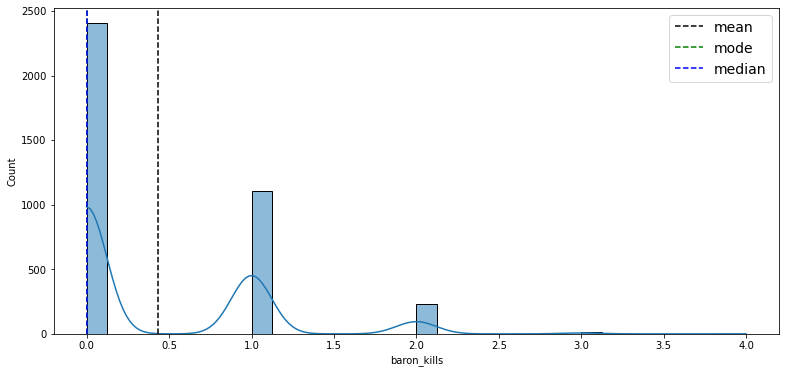

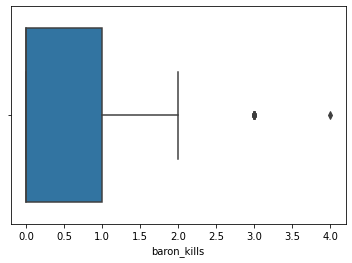

Medidas de tendencia central de  champion_kills
Mediana:  31.0
Media:  30.627591706539075
Moda:  33
Desviación estándar:  13.868080336335884


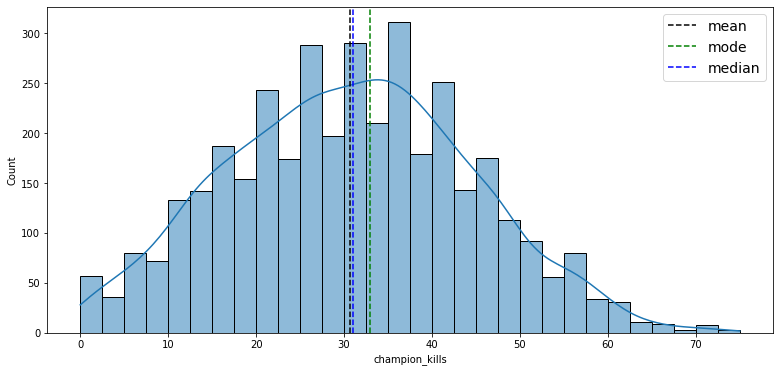

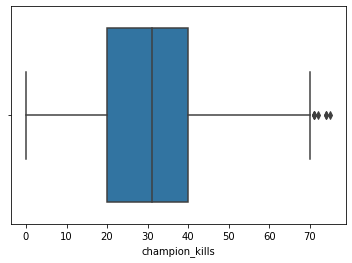

Medidas de tendencia central de  dragon_kills
Mediana:  2.0
Media:  1.888623072833599
Moda:  2
Desviación estándar:  1.3519593025436898


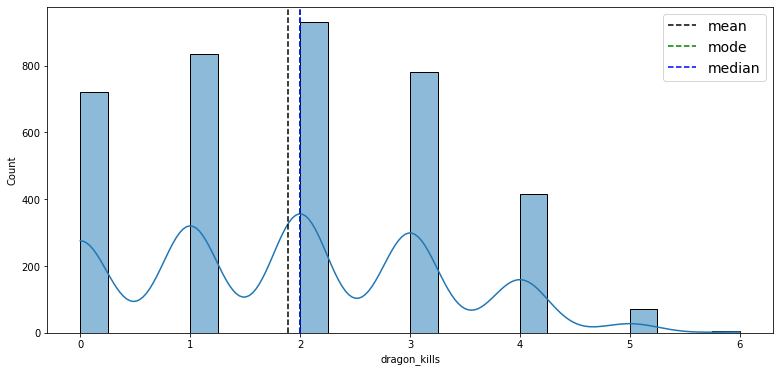

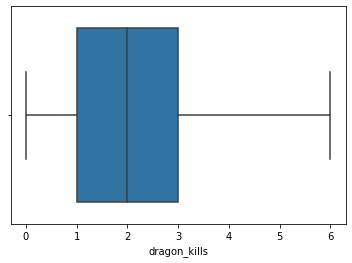

Medidas de tendencia central de  inhibitor_kills
Mediana:  0.0
Media:  0.8495481127060075
Moda:  0
Desviación estándar:  1.1127412526719465


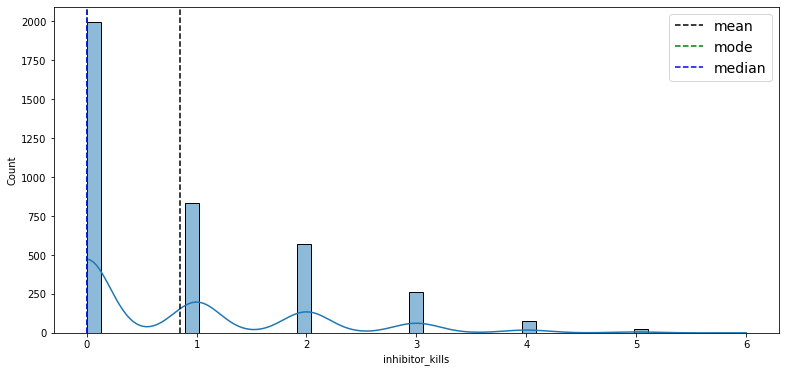

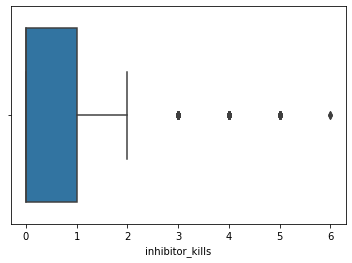

Medidas de tendencia central de  riftHerald_kills
Mediana:  1.0
Media:  0.7527910685805422
Moda:  0
Desviación estándar:  0.7361403426223415


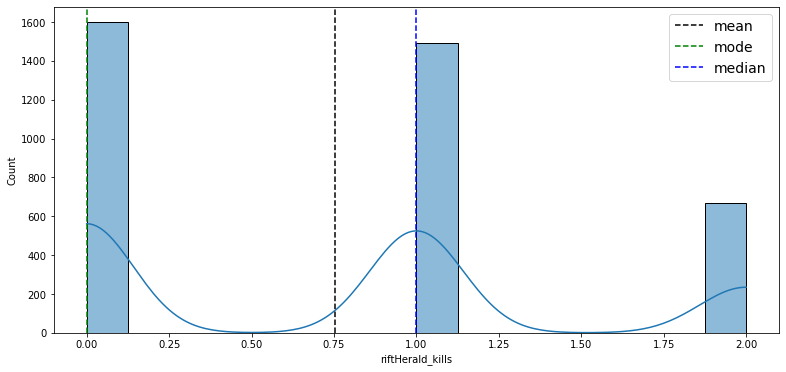

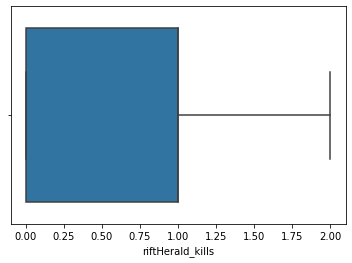

Medidas de tendencia central de  tower_kills
Mediana:  5.0
Media:  5.373205741626794
Moda:  0
Desviación estándar:  3.632844468292696


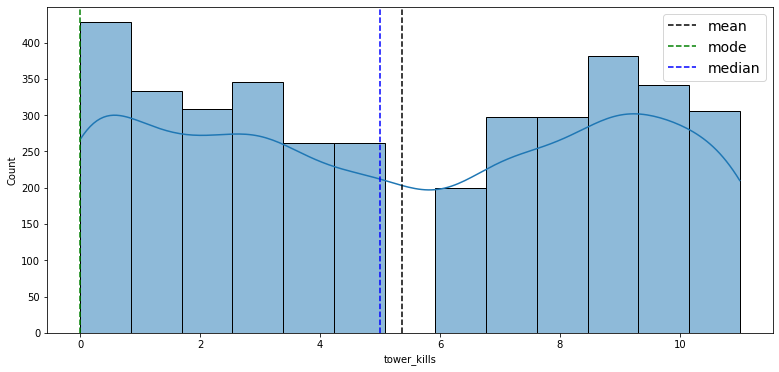

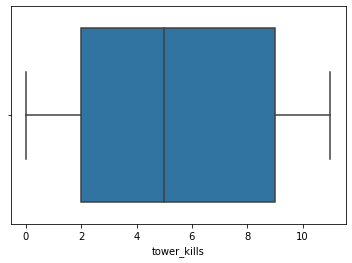

Medidas de tendencia central de  gameDuration
Mediana:  1669.0
Media:  1663.3684210526317
Moda:  1483
Desviación estándar:  452.06898745062153


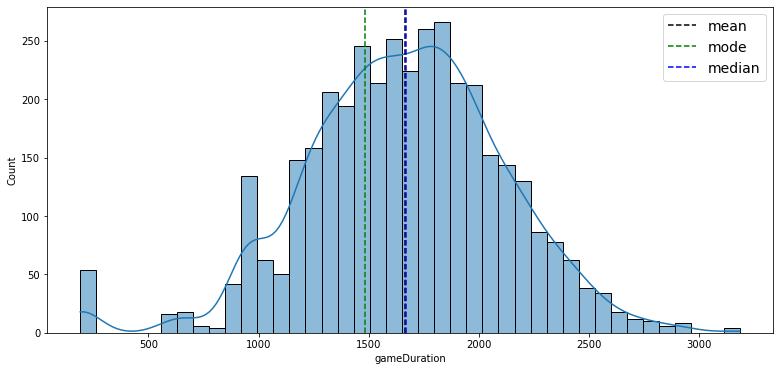

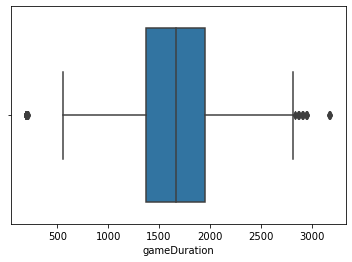

In [24]:
for columna in cols_x: 
    histograma(data[columna])

Se utilizan los diferentes algoritmos para analizar los modelos

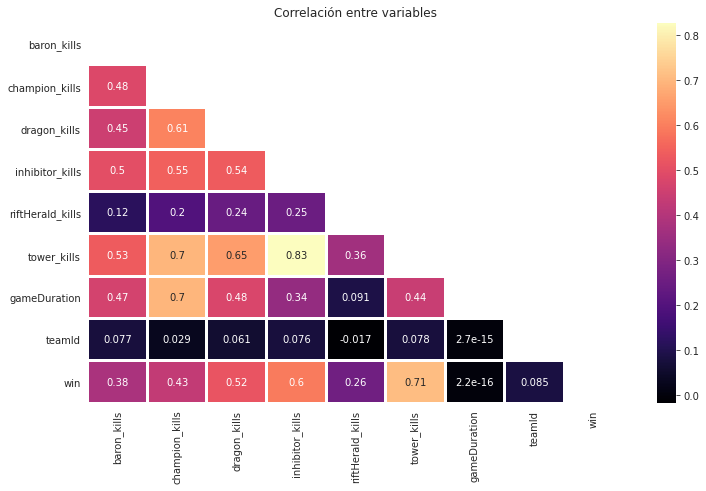

In [25]:
#Mapa de calor de las correlaciones:

#se obtienen las correlaciones
correlaciones = data.corr()

#se crea una máscara
mask = np.zeros_like(correlaciones) #indicar los datos
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,7))

with sns.axes_style("white"):
    sns.heatmap(correlaciones,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlación entre variables")
plt.savefig(str('data_lol')+'_corr'+".png")
plt.show()

LinearRegression()
Error cuadrático medio: 0.07775072696409539
Raíz del error cuadrático medio: 0.27883817343415407
El coeficiente de determinación es: 0.6886539030397414


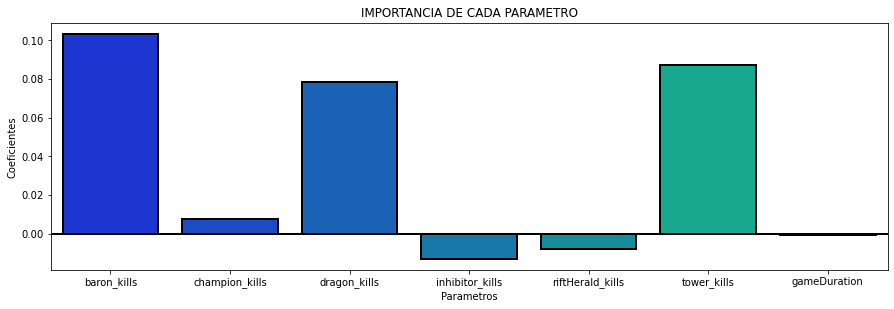

In [27]:
#REGRESION LINEAL
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
coeficientes = modelos(test_X, test_Y, train_X, train_Y, lr, "lineal")

In [6]:
print(coeficientes)

          0       importancia
0  0.103273       baron_kills
1  0.007668    champion_kills
2  0.078371      dragon_kills
3 -0.012896   inhibitor_kills
4 -0.007661  riftHerald_kills
5  0.087509       tower_kills
6 -0.000650      gameDuration


Lasso()
Error cuadrático medio: 0.17086953242270908
Raíz del error cuadrático medio: 0.4133636805800784
El coeficiente de determinación es: 0.31576765791782335


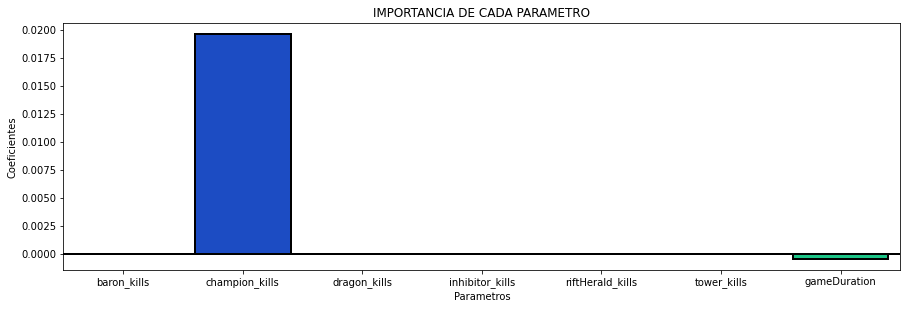

In [30]:
#REGRESION DE LASSO
from sklearn.linear_model import Lasso
ls = Lasso()
coeficientes = modelos(test_X, test_Y, train_X, train_Y, ls, "lineal")

In [8]:
print(coeficientes)

          0       importancia
0  0.000000       baron_kills
1  0.019606    champion_kills
2  0.000000      dragon_kills
3  0.000000   inhibitor_kills
4  0.000000  riftHerald_kills
5  0.000000       tower_kills
6 -0.000417      gameDuration


Ridge(alpha=1000)
Error cuadrático medio: 0.0784325666238
Raíz del error cuadrático medio: 0.2800581486473836
El coeficiente de determinación es: 0.6859235347835092
          0       importancia
0  0.048037       baron_kills
1  0.008874    champion_kills
2  0.063166      dragon_kills
3  0.007618   inhibitor_kills
4 -0.001625  riftHerald_kills
5  0.083801       tower_kills
6 -0.000623      gameDuration


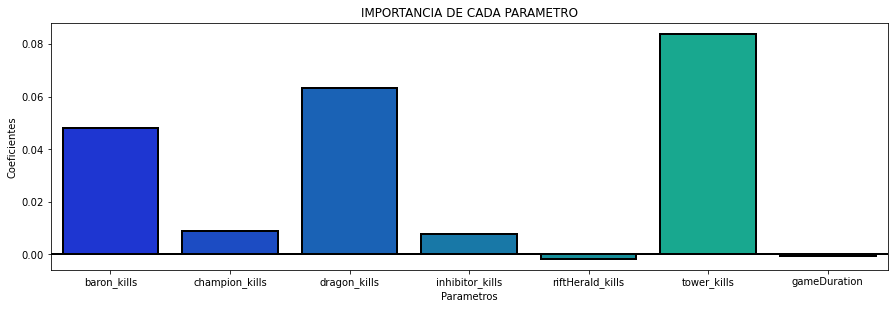

In [31]:
#REGRESION DE RIDGE
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
coeficientes = modelos(test_X, test_Y, train_X, train_Y, ridge, "lineal")
print(coeficientes)

In [10]:
print(coeficientes)

          0       importancia
0  0.048037       baron_kills
1  0.008874    champion_kills
2  0.063166      dragon_kills
3  0.007618   inhibitor_kills
4 -0.001625  riftHerald_kills
5  0.083801       tower_kills
6 -0.000623      gameDuration


RandomForestRegressor()
Error cuadrático medio: 0.051835821295317594
Raíz del error cuadrático medio: 0.22767481480242296
El coeficiente de determinación es: 0.7924279132402275
          0       importancia
0  0.017359       baron_kills
1  0.088849    champion_kills
2  0.041274      dragon_kills
3  0.310112   inhibitor_kills
4  0.013012  riftHerald_kills
5  0.302021       tower_kills
6  0.227373      gameDuration


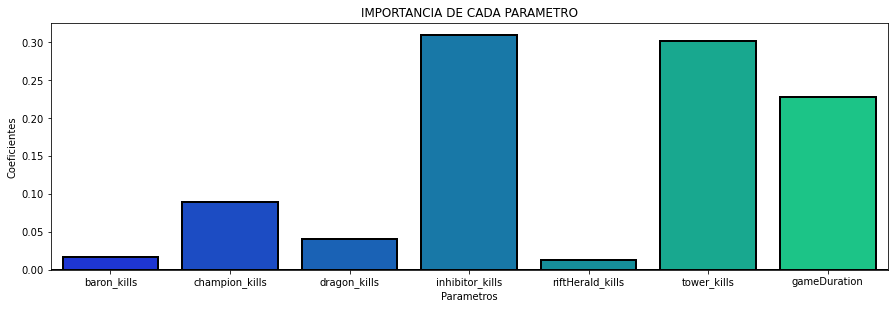

In [32]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
coeficientes = modelos(test_X, test_Y, train_X, train_Y, rf, "compleja")
print(coeficientes)

In [12]:
print(coeficientes)

          0       importancia
0  0.016663       baron_kills
1  0.087007    champion_kills
2  0.040183      dragon_kills
3  0.313919   inhibitor_kills
4  0.014119  riftHerald_kills
5  0.301984       tower_kills
6  0.226125      gameDuration


AdaBoostRegressor()
Error cuadrático medio: 0.08670835868135925
Raíz del error cuadrático medio: 0.2944628307297192
El coeficiente de determinación es: 0.6527838374844004
          0       importancia
0  0.029606       baron_kills
1  0.085059    champion_kills
2  0.115845      dragon_kills
3  0.205069   inhibitor_kills
4  0.000000  riftHerald_kills
5  0.273449       tower_kills
6  0.290973      gameDuration


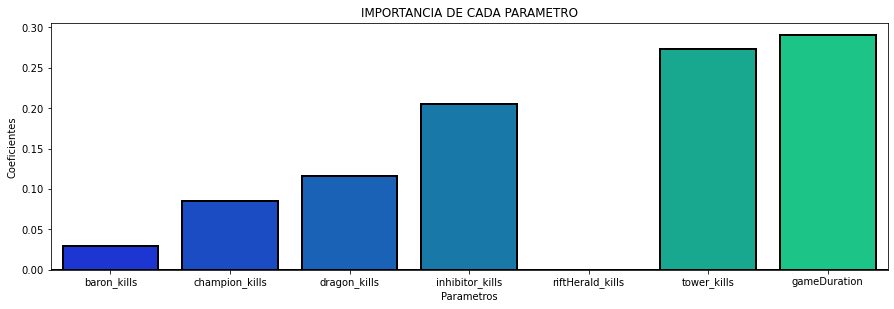

In [33]:
#ADA BOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
coeficientes = modelos(test_X, test_Y, train_X, train_Y, adb, "compleja")
print(coeficientes)

In [14]:
print(coeficientes)

          0       importancia
0  0.019572       baron_kills
1  0.087616    champion_kills
2  0.076993      dragon_kills
3  0.188289   inhibitor_kills
4  0.000000  riftHerald_kills
5  0.325083       tower_kills
6  0.302447      gameDuration


#### Documentación


https://scikit-learn.org/stable/user_guide.html